## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [39]:
X.isna().count()

,0
alcohol,178
malic_acid,178
ash,178
alcalinity_of_ash,178
magnesium,178
total_phenols,178
flavanoids,178
nonflavanoid_phenols,178
proanthocyanins,178
color_intensity,178


In [40]:
sum(np.isnan(y))

np.int64(0)

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [41]:
!pip install scikit-learn

In [42]:
from sklearn.model_selection import train_test_split


In [43]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
X_train.shape

(124, 13)

In [47]:
NN = [1, 3, 5, 10, 15, 25]
Train = []
Test = []
X_train_columns = X_train[:, [0,4]]
X_test_columns = X_test[:, [0,4]]
for i in NN:
  KNN = KNeighborsClassifier(n_neighbors = i, weights = "distance")
  KNN.fit(X_train_columns, y_train)
  preds_train = KNN.predict(X_train_columns)
  train_acc = sum(preds_train == y_train)/len(y_train)
  Train.append(train_acc)
  preds_test = KNN.predict(X_test_columns)
  test_acc = sum(preds_test == y_test)/len(y_test)
  Test.append(test_acc)

answer = {
    "NN" : NN,
    "Train": Train,
    "Test": Test
}
answer = pd.DataFrame(answer)
answer

,NN,Train,Test
0,1,0.991935,0.666667
1,3,0.991935,0.685185
2,5,0.991935,0.685185
3,10,0.991935,0.703704
4,15,0.991935,0.722222
5,25,0.991935,0.722222


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [48]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [49]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

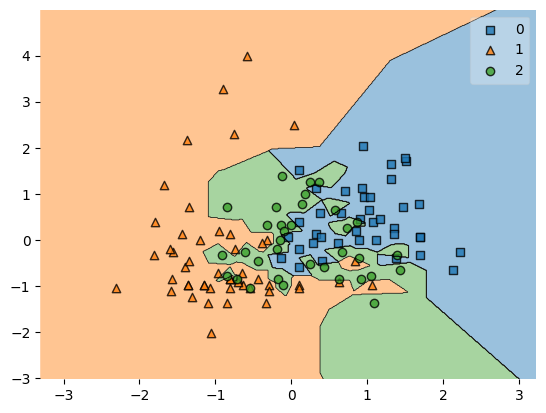

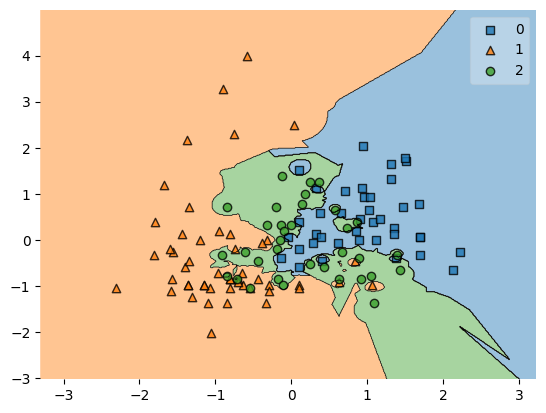

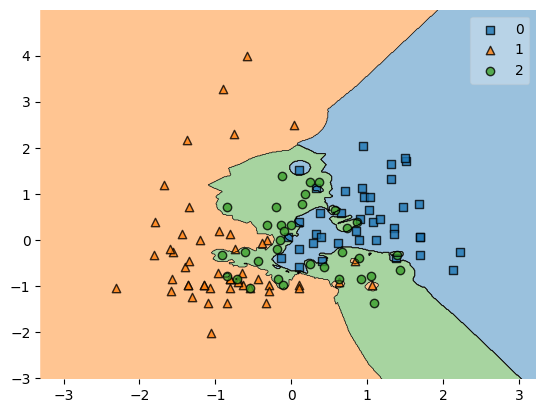

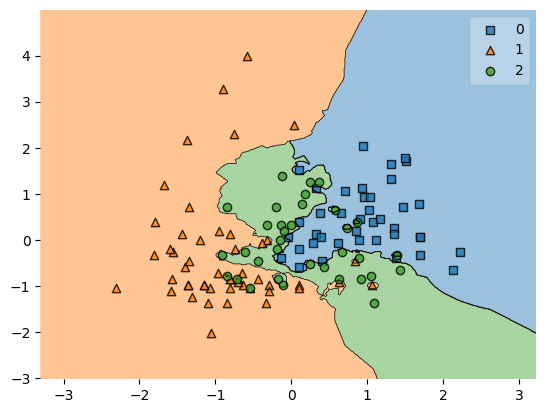

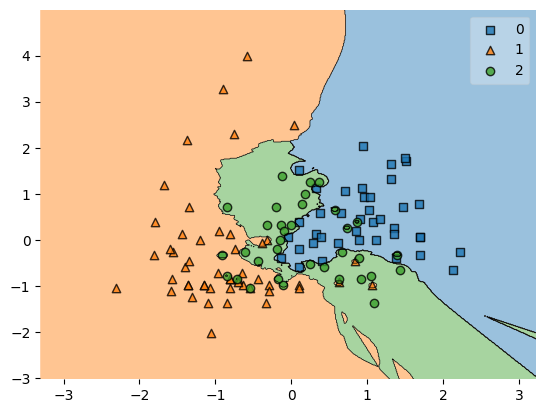

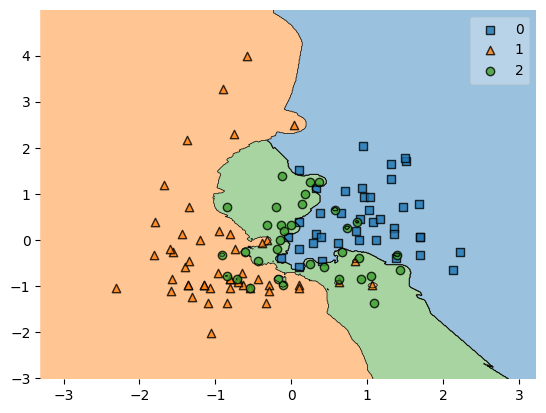

,NN,Train,Test
0,1,0.991935,0.666667
1,3,0.991935,0.685185
2,5,0.991935,0.685185
3,10,0.991935,0.703704
4,15,0.991935,0.722222
5,25,0.991935,0.722222


In [50]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
NN = [1, 3, 5, 10, 15, 25]
Train = []
Test = []
X_train_columns = X_train[:, [0,4]]
X_test_columns = X_test[:, [0,4]]
for i in NN:
  KNN = KNeighborsClassifier(n_neighbors = i, weights = "distance")
  KNN.fit(X_train_columns, y_train)
  preds_train = KNN.predict(X_train_columns)
  train_acc = sum(preds_train == y_train)/len(y_train)
  Train.append(train_acc)
  preds_test = KNN.predict(X_test_columns)
  test_acc = sum(preds_test == y_test)/len(y_test)
  Test.append(test_acc)
  plot_decision_regions(X_train_columns,y_train, clf = KNN)
  plt.show()

answer = {
    "NN" : NN,
    "Train": Train,
    "Test": Test
}
answer = pd.DataFrame(answer)
answer

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

Видимо из за еквклидовой меры точность на трейне всегда почти 1 (не 1 из за того что какие-то 2 измерения одинаковые) Оптимально использовать больше 25, так как точность повышается и чем больше N тем более гладкие границы(а для нас это хорошо так как "островков" не много)

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

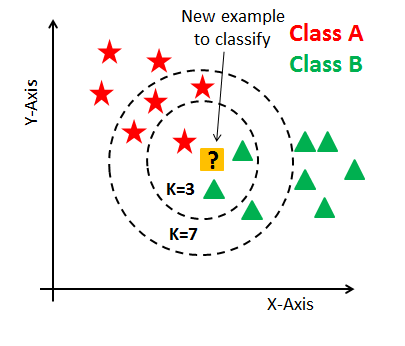

In [136]:
import numpy as np
from collections import Counter
import math
def eiler_dist(arr_1, arr_2):
  return math.sqrt(sum((arr_1 - arr_2)**2))

class KNN:
    def __init__(self, k:int):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
      self.X_train = X
      self.y_train = y
      return self

    def predict(self, X):
      answers = []

      for i in range(X.shape[0]):
        new_arr = np.tile(X[i, :], (self.X_train.shape[0],1))

        len_arr = np.sum((new_arr - self.X_train)**2, axis = 1, keepdims=True)
        catted_arr = np.concatenate((len_arr, self.y_train.reshape(len(self.y_train),1)), axis = 1)
        len_with_classes = catted_arr[np.lexsort((-catted_arr[:, 1], -catted_arr[:, 0]))]
        print(np.lexsort((catted_arr[:, 0],catted_arr[:, 1])),"\n", "\n")
        print(np.lexsort(catted_arr))
        print(catted_arr)
        print(len_with_classes)
        result = len_with_classes[-self.k:, 1]
        print(result, "HG")
        unique, counts = np.unique(result, return_counts = True)

        index = np.argmax(counts)
        answers.append (unique[index])

      return answers

In [141]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1, 0]

In [142]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

[0 1] 
 

[0 1]
[[0.5 0. ]
 [0.5 1. ]]
[[0.5 1. ]
 [0.5 0. ]]
[0.] HG
[3 2 1 0 8 9 7 6 5 4] 
 

[0 1]
[[144.5   0. ]
 [112.5   0. ]
 [ 84.5   0. ]
 [ 60.5   0. ]
 [ 40.5   1. ]
 [ 24.5   1. ]
 [ 12.5   1. ]
 [  4.5   1. ]
 [  0.5   1. ]
 [  0.5   1. ]]
[[144.5   0. ]
 [112.5   0. ]
 [ 84.5   0. ]
 [ 60.5   0. ]
 [ 40.5   1. ]
 [ 24.5   1. ]
 [ 12.5   1. ]
 [  4.5   1. ]
 [  0.5   1. ]
 [  0.5   1. ]]
[1. 1. 1.] HG
[3 2 1 0 4 5 6 7 8 9] 
 

[1 0]
[[40.5  0. ]
 [24.5  0. ]
 [12.5  0. ]
 [ 4.5  0. ]
 [ 0.5  1. ]
 [ 0.5  1. ]
 [ 4.5  1. ]
 [12.5  1. ]
 [24.5  1. ]
 [40.5  1. ]]
[[40.5  1. ]
 [40.5  0. ]
 [24.5  1. ]
 [24.5  0. ]
 [12.5  1. ]
 [12.5  0. ]
 [ 4.5  1. ]
 [ 4.5  0. ]
 [ 0.5  1. ]
 [ 0.5  1. ]]
[0. 1. 1.] HG
[3 2 1 0 9 8 7 6 5 4] 
 

[1 0]
[[392   0]
 [338   0]
 [288   0]
 [242   0]
 [200   1]
 [162   1]
 [128   1]
 [ 98   1]
 [ 72   1]
 [ 50   1]]
[[392   0]
 [338   0]
 [288   0]
 [242   0]
 [200   1]
 [162   1]
 [128   1]
 [ 98   1]
 [ 72   1]
 [ 50   1]]
[1 1 1] HG
[3 2 1 0 

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [55]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.

In [56]:
type(data)

pandas.core.frame.DataFrame

In [57]:
np.sum(data.isna())

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [58]:
new_data = data.drop("Unnamed: 0", axis = 1)

In [59]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output = False)

In [60]:
smth = encoder.fit_transform(new_data[["cut","color","clarity"]])
smth.shape

(53940, 20)

In [61]:
names = encoder.get_feature_names_out()
names

array(['cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium',
       'cut_Very Good', 'color_D', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'], dtype=object)

In [62]:
df_n = pd.concat([pd.DataFrame(data = smth, columns = names),new_data.drop(["cut","color","clarity"], axis = 1)], axis = 1)
df_n

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,...,clarity_VS2,clarity_VVS1,clarity_VVS2,carat,depth,table,price,x,y,z
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.86,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?
Размеры и количество карат

In [63]:
df_n.corr()

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,...,clarity_VS2,clarity_VVS1,clarity_VVS2,carat,depth,table,price,x,y,z
cut_Fair,1.000000,-0.055482,-0.143078,-0.102801,-0.094236,-0.012893,-0.019334,0.007763,-0.006171,0.016646,...,-0.027266,-0.039920,-0.030703,0.091844,0.280657,0.125332,0.018728,0.080644,0.068822,0.110367
cut_Good,-0.055482,1.000000,-0.258018,-0.185385,-0.169940,0.008909,0.007013,0.006949,-0.024729,-0.009517,...,-0.021063,-0.037564,-0.038627,0.034196,0.136114,0.175174,-0.000312,0.030349,0.032187,0.045169
cut_Ideal,-0.143078,-0.258018,1.000000,-0.478074,-0.438243,0.014521,-0.001105,0.001351,0.034649,-0.021264,...,0.015669,0.088354,0.075508,-0.163660,-0.022778,-0.549599,-0.097175,-0.162674,-0.153158,-0.158688
cut_Premium,-0.102801,-0.185385,-0.478074,1.000000,-0.314877,-0.016566,-0.018500,-0.012098,0.003859,0.027895,...,0.022611,-0.053852,-0.061949,0.116245,-0.198306,0.338072,0.095706,0.126820,0.107943,0.090019
cut_Very Good,-0.094236,-0.169940,-0.438243,-0.314877,1.000000,-0.000608,0.023711,0.003110,-0.025171,-0.004437,...,-0.016412,-0.005251,0.015284,0.009568,0.025828,0.119971,0.006593,0.004569,0.016699,0.016039
color_D,-0.012893,0.008909,0.014521,-0.016566,-0.000608,1.000000,-0.178550,-0.175704,-0.195021,-0.161672,...,0.021007,-0.046091,-0.015975,-0.112057,-0.013566,-0.008921,-0.072473,-0.106127,-0.103999,-0.105216
color_E,-0.019334,0.007013,-0.001105,-0.018500,0.023711,-0.178550,1.000000,-0.218401,-0.242411,-0.200958,...,0.027954,-0.001502,0.011683,-0.139215,-0.028713,0.007172,-0.101089,-0.134213,-0.130136,-0.132210
color_F,0.007763,0.006949,0.001351,-0.012098,0.003110,-0.175704,-0.218401,1.000000,-0.238547,-0.197755,...,0.003775,0.016901,0.013128,-0.060052,-0.017741,-0.004906,-0.024161,-0.048021,-0.046707,-0.048803
color_G,-0.006171,-0.024729,0.034649,0.003859,-0.025171,-0.195021,-0.242411,-0.238547,1.000000,-0.219496,...,-0.023829,0.042398,0.059744,-0.029038,0.002768,-0.038815,0.008556,-0.024593,-0.024479,-0.024582
color_H,0.016646,-0.009517,-0.021264,0.027895,-0.004437,-0.161672,-0.200958,-0.197755,-0.219496,1.000000,...,-0.029923,0.004561,-0.030271,0.102465,0.026037,0.011574,0.059223,0.095896,0.093480,0.095041


**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [96]:
df_X = df_n.drop("price", axis = 1)
df_y = df_n["price"]
df_y

,price
0,326
1,326
2,327
3,334
4,335
...,...
53935,2757
53936,2757
53937,2757
53938,2757


In [97]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.3)
y_test

,price
48697,2008
43955,516
22807,10832
21669,9768
21203,9346
...,...
51726,2401
20610,8911
5218,3781
12425,5241


**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [98]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [119]:
print(mean_squared_error(y_train, model.predict(X_train)))
print(mean_squared_error(y_test, model.predict(X_test)))

16805146.25271206
16675465.077802798


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [100]:
model.coef_

array([-1.18266809e+02, -3.91314869e+01,  5.29899200e+01,  1.38537459e+01,
       -1.16687325e+00,  2.08988994e+02,  1.59197227e+02,  1.35460729e+02,
        5.77880159e+01, -1.30262591e+02, -2.46644463e+02, -3.82783595e+02,
       -4.75692042e+02,  2.39357437e+02, -1.51578709e+02, -4.88431290e+02,
        2.02654223e+02,  1.06332058e+02,  2.54431588e+02,  2.74608507e+02,
        5.25649832e+03, -8.82048444e+01, -5.36022973e+01, -1.04286409e+03,
       -4.64966187e+00, -3.28176067e+01])

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [101]:
from sklearn.linear_model import Lasso, Ridge
Lasso_m = Lasso(alpha = 0.1)
Ridge_m = Ridge(alpha = 10)
Lasso_m.fit(X_train, y_train)
Ridge_m.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.543e+08, tolerance: 6.019e+07
  model = cd_fast.enet_coordinate_descent(


Ridge(alpha=10)

In [102]:
Lasso_m.coef_

array([-1.23672071e+02, -4.81154492e+01,  3.75242655e+01,  0.00000000e+00,
       -1.42893372e+01,  2.78210583e+02,  2.39963845e+02,  2.15085434e+02,
        1.42932445e+02, -5.45153448e+01, -1.83754931e+02, -3.36223685e+02,
       -5.09258541e+02,  1.87667813e+02, -2.75180633e+02, -5.96417659e+02,
        9.93510628e+01, -1.44002158e+01,  1.81842498e+02,  1.90900649e+02,
        5.25202010e+03, -8.78757253e+01, -5.34704561e+01, -1.03861953e+03,
       -4.45219229e+00, -3.29543455e+01])

In [103]:
Ridge_m.coef_

array([-1.18495433e+02, -3.92322277e+01,  5.29858506e+01,  1.38527764e+01,
       -9.98341799e-01,  2.08748138e+02,  1.58977960e+02,  1.35030015e+02,
        5.75543963e+01, -1.30005105e+02, -2.46053109e+02, -3.82091637e+02,
       -4.75183365e+02,  2.39669497e+02, -1.52092574e+02, -4.88259370e+02,
        2.02452933e+02,  1.06176080e+02,  2.54871252e+02,  2.74840224e+02,
        5.22094050e+03, -8.57722002e+01, -5.33549102e+01, -1.00233796e+03,
       -6.90190163e+00, -3.65848187e+01])

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.543e+08, tolerance: 6.019e+07
  model = cd_fast.enet_coordinate_descent(


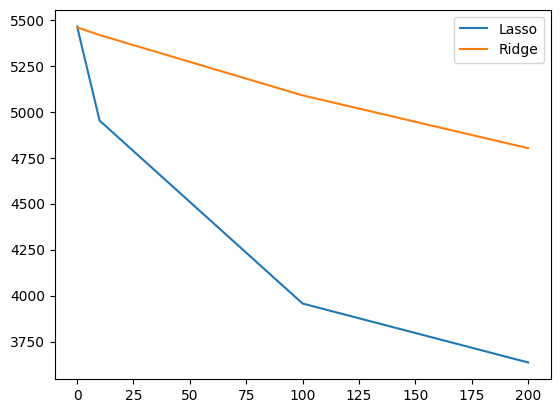

In [104]:
alpha = [0.1, 1, 10, 100, 200]
Lasso_values = []
Ridge_values = []

for i in alpha:
  Lasso_m = Lasso(alpha = i)
  Ridge_m = Ridge(alpha = i)
  Lasso_m.fit(X_train, y_train)
  Ridge_m.fit(X_train, y_train)
  Lasso_values.append(np.linalg.norm(Lasso_m.coef_))
  Ridge_values.append(np.linalg.norm(Ridge_m.coef_))

plt.plot(alpha, Lasso_values, label = "Lasso")
plt.plot(alpha, Ridge_values, label = "Ridge")
plt.legend()
plt.show()

**Задача 3.11 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [112]:
from sklearn.linear_model import LassoCV
model = LassoCV(alphas = [0.1, 0.001, 10, 100,200], cv = 5, fit_intercept = False)
model.fit(X_train, y_train)
print(model.mse_path_)
print(model.alphas_)
print(model.coef_)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 354243269.67541504, tolerance: 95294466.8745
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 345981224.19641113, tolerance: 95087376.684
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 344740981.50109863, tolerance: 94874637.1407
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Obje

[[17330217.34925162 17718399.07590296 17502085.6080716  17517186.33135531
  17289114.37810879]
 [16999268.60173009 17286388.03409826 17083868.36701744 17067315.83839259
  16882703.27622975]
 [16937216.66028056 16988572.37597487 16804696.88198195 16796133.93046416
  16708065.66219561]
 [16949922.25719665 16969504.43559777 16794644.46306542 16781770.28848467
  16701687.86374241]
 [16950365.88392032 16969440.90692592 16794672.70002416 16781813.62624722
  16701722.53256688]]
[2.e+02 1.e+02 1.e+01 1.e-01 1.e-03]
[-1.23672071e+02 -4.81154492e+01  3.75242655e+01  0.00000000e+00
 -1.42893372e+01  2.78210583e+02  2.39963845e+02  2.15085434e+02
  1.42932445e+02 -5.45153448e+01 -1.83754931e+02 -3.36223685e+02
 -5.09258541e+02  1.87667813e+02 -2.75180633e+02 -5.96417659e+02
  9.93510628e+01 -1.44002158e+01  1.81842498e+02  1.90900649e+02
  5.25202010e+03 -8.78757253e+01 -5.34704561e+01 -1.03861953e+03
 -4.45219229e+00 -3.29543455e+01]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.225e+09, tolerance: 1.187e+08
  model = cd_fast.enet_coordinate_descent(


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [116]:
from sklearn.metrics import mean_squared_error
Lasso_m = Lasso(alpha = 0.1)
Lasso_m.fit(X_train, y_train)
print(Lasso_m.coef_)
dicton = {x : y for x,y in zip(names, Lasso_m.coef_)}
dicton






[-1.23672071e+02 -4.81154492e+01  3.75242655e+01  0.00000000e+00
 -1.42893372e+01  2.78210583e+02  2.39963845e+02  2.15085434e+02
  1.42932445e+02 -5.45153448e+01 -1.83754931e+02 -3.36223685e+02
 -5.09258541e+02  1.87667813e+02 -2.75180633e+02 -5.96417659e+02
  9.93510628e+01 -1.44002158e+01  1.81842498e+02  1.90900649e+02
  5.25202010e+03 -8.78757253e+01 -5.34704561e+01 -1.03861953e+03
 -4.45219229e+00 -3.29543455e+01]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.543e+08, tolerance: 6.019e+07
  model = cd_fast.enet_coordinate_descent(


{'cut_Fair': np.float64(-123.67207050304023),
 'cut_Good': np.float64(-48.11544920503628),
 'cut_Ideal': np.float64(37.52426554226844),
 'cut_Premium': np.float64(0.0),
 'cut_Very Good': np.float64(-14.289337209879694),
 'color_D': np.float64(278.2105834662163),
 'color_E': np.float64(239.9638452482609),
 'color_F': np.float64(215.0854340943058),
 'color_G': np.float64(142.93244473025942),
 'color_H': np.float64(-54.515344777133805),
 'color_I': np.float64(-183.7549314092656),
 'color_J': np.float64(-336.22368480875303),
 'clarity_I1': np.float64(-509.2585411577449),
 'clarity_IF': np.float64(187.66781322695758),
 'clarity_SI1': np.float64(-275.1806326584338),
 'clarity_SI2': np.float64(-596.4176593760046),
 'clarity_VS1': np.float64(99.3510628362441),
 'clarity_VS2': np.float64(-14.400215771263928),
 'clarity_VVS1': np.float64(181.84249793429183),
 'clarity_VVS2': np.float64(190.90064875187045)}

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [117]:
print(mean_squared_error(y_test, Lasso_m.predict(X_test)))

1227739.6923609385


Регуляризация лучше потому что а) мы не даём коррелирующим признакам компенсировать друг друга(один в + второй в -), а также не даём модели упороться в 1 признак что приводит к поиску новых локальных минимумов